## GTZAN dataset 샘플 음성 데이터 Wavehow, Augmentation 적용

### 오디오 파일 읽기

In [1]:

import matplotlib.pyplot as plt
import librosa
import librosa.display

import os
import glob
import numpy as np
import IPython
import random

In [3]:
audio_path = 'C:/Users/iiile/Vscode_jupyter/raw_data\jazz\jazz.00000.wav'

data, sr = librosa.load(audio_path, sr=22050)   #sr =샘플링 주파수

IPython.display.Audio(data, rate=sr)

### 음성데이터 waveshow변환

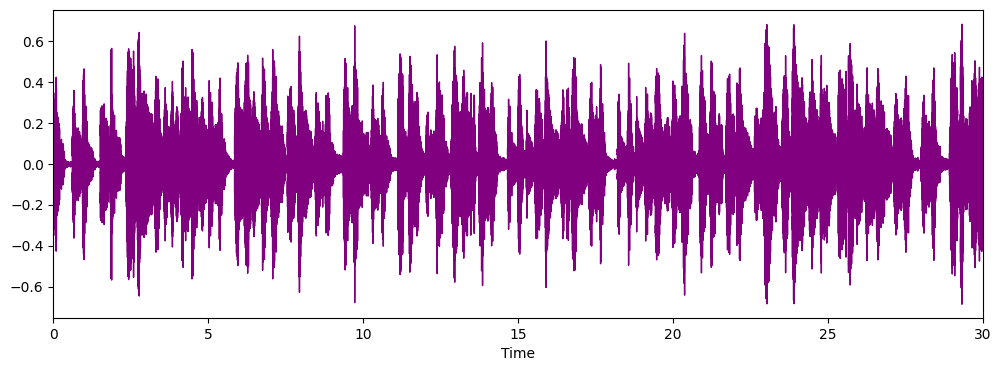

In [9]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data, color='purple')
plt.show()

### waveshow 0-10초 구간만 파형 출력

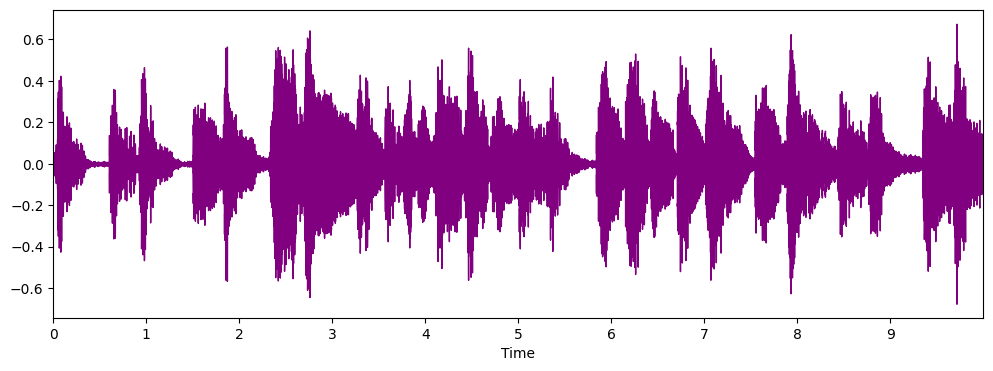

In [10]:
start_time = 0
end_time=10
start_sample = sr * start_time
end_sample = sr * end_time
data_section = data[start_sample: end_sample]

plt.figure(figsize=(12,4))
librosa.display.waveplot(data_section, color='purple')
plt.show()

#### 노이즈 추가

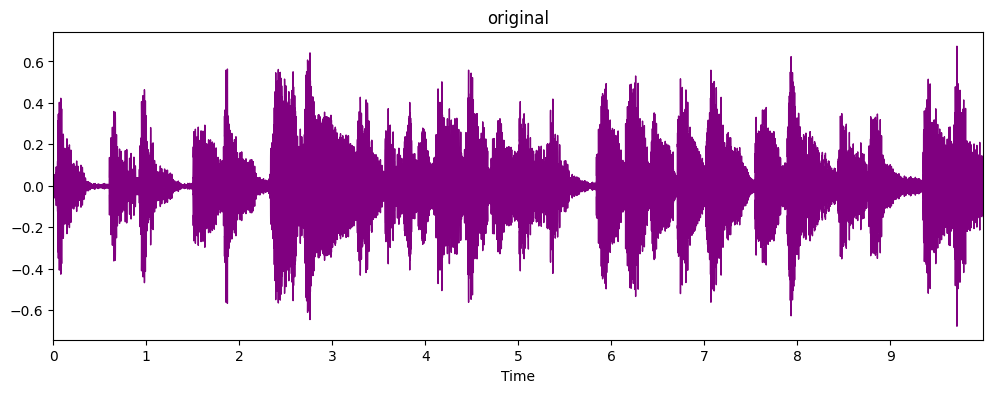

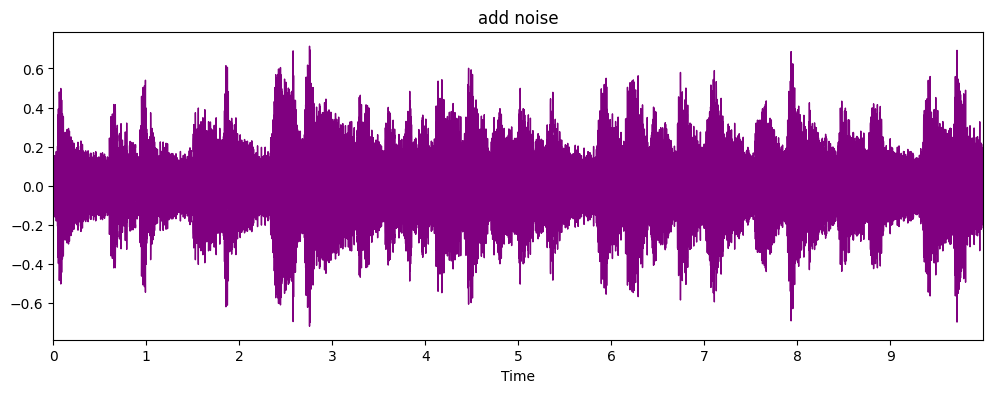

In [18]:
nosie = 0.05 * np.random.randn(*data_section.shape)
data_augmented = data_section + nosie

#비교출력
plt.figure(figsize=(12,4))
librosa.display.waveplot(data_section, color='purple')
plt.title('original')

plt.figure(figsize=(12,4))
librosa.display.waveplot(data_augmented, color='purple')
plt.title('add noise')
plt.show()

#### stretch 추가

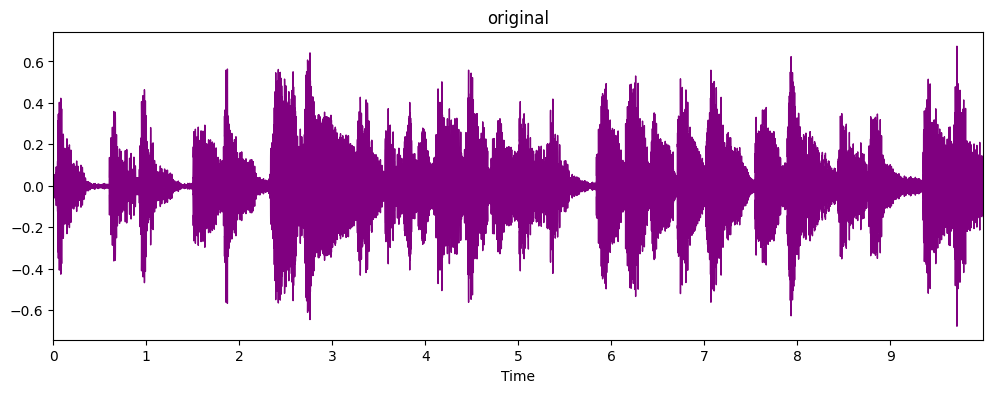

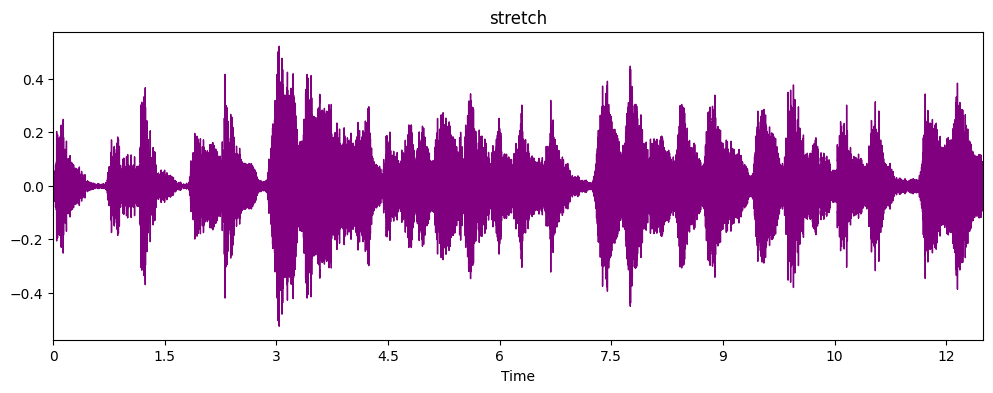

In [19]:
#stretch 기법
data_stretch = librosa.effects.time_stretch(data_section, rate=0.8)

#비교출력
plt.figure(figsize=(12,4))
librosa.display.waveplot(data_section, color='purple')
plt.title('original')

plt.figure(figsize=(12,4))
librosa.display.waveplot(data_stretch, color='purple')
plt.title('stretch')
plt.show()

## GTZAN dataset 샘플 음성 데이터 STFT변환 및 Augmentation 적용

### 음성데이터 STFT 변환

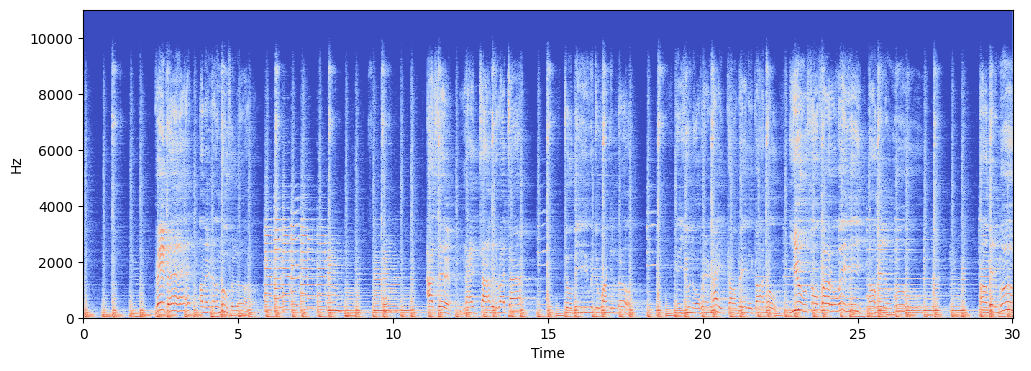

In [21]:
# STFT 계산
stft = librosa.stft(data)

# dB 변환
stft_db = librosa.amplitude_to_db(abs(stft))

plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.show()

###  0-10초 구간 추출

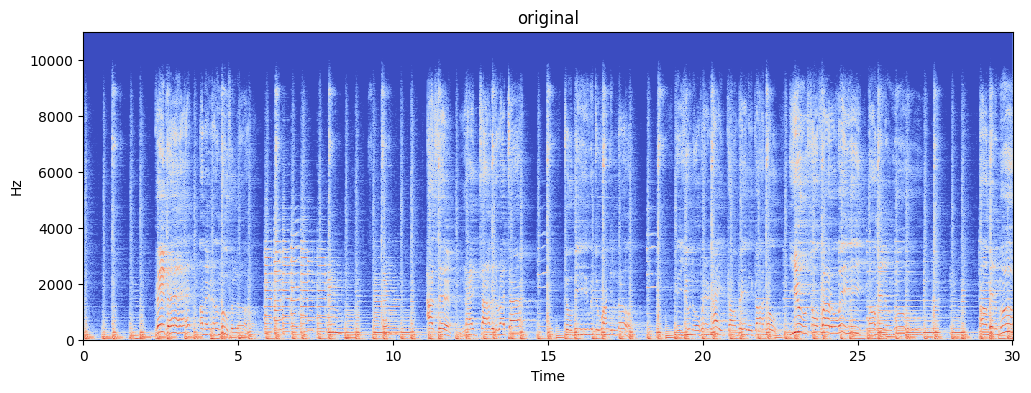

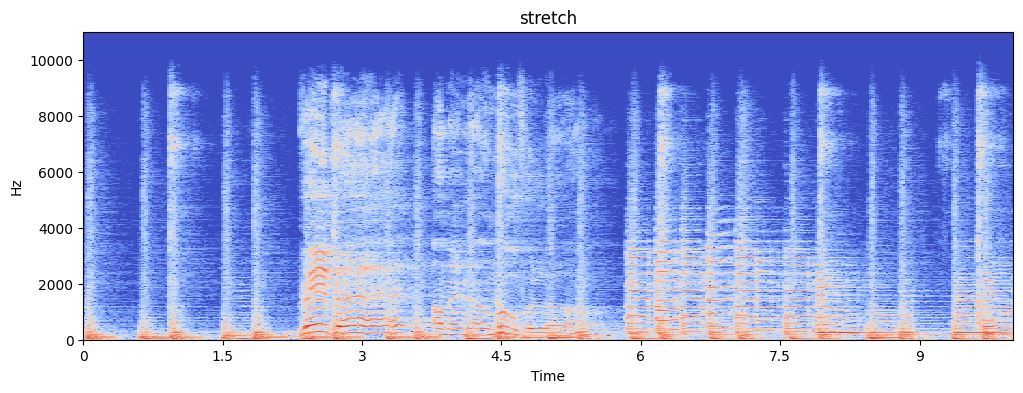

In [23]:
"""
start_time = 0
end_time=10
start_sample = sr * start_time
end_sample = sr * end_time
data_section = data[start_sample: end_sample]
"""

# STFT계산
stft_temp = librosa.stft(data_section)
# dB 변환
stft_db_temp = librosa.amplitude_to_db(abs(stft_temp))

#비교출력
plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.title('original')

plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db_temp, sr=sr, x_axis='time', y_axis='hz')
plt.title('stretch')
plt.show()

### 노이즈 추가

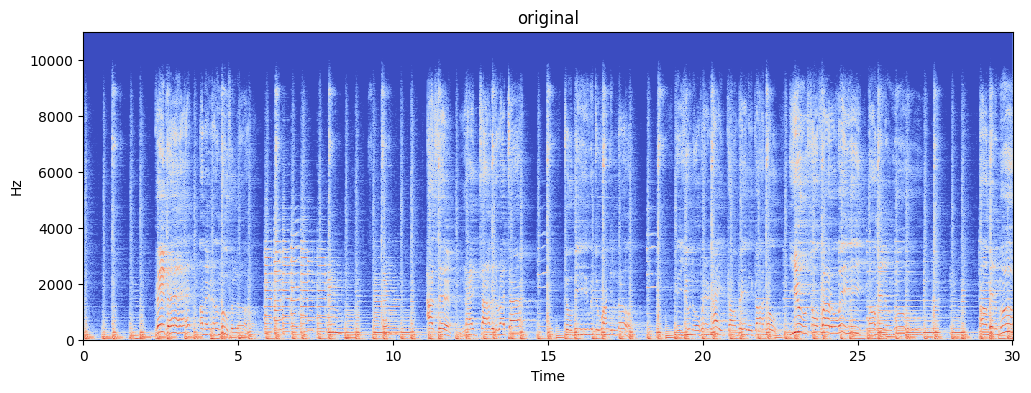

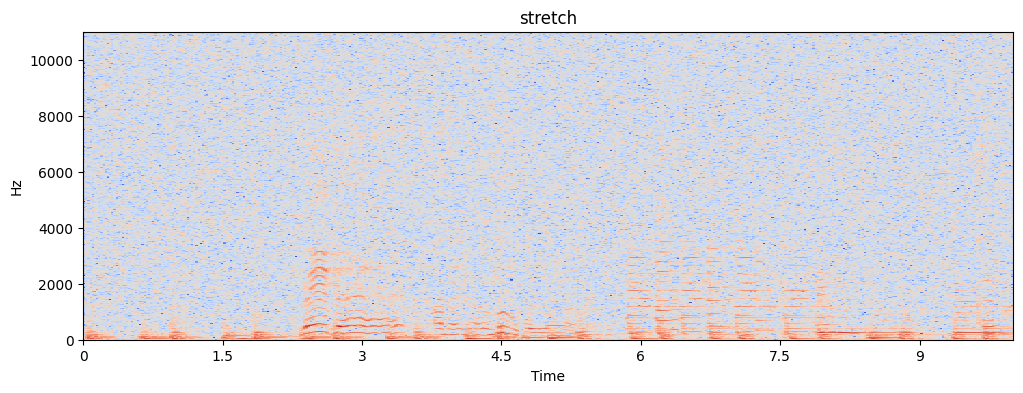

In [25]:
'''
nosie = 0.05 * np.random.randn(*data_section.shape)
data_augmented = data_section + nosie
'''

# STFT 계산
stft_nosie = librosa.stft(data_augmented)
stft_nosie_db = librosa.amplitude_to_db(abs(stft_nosie))

#비교출력
plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.title('original')

plt.figure(figsize=(12,4))
librosa.display.specshow(stft_nosie_db, sr=sr, x_axis='time', y_axis='hz')
plt.title('stretch')
plt.show()

### Stretch 추가


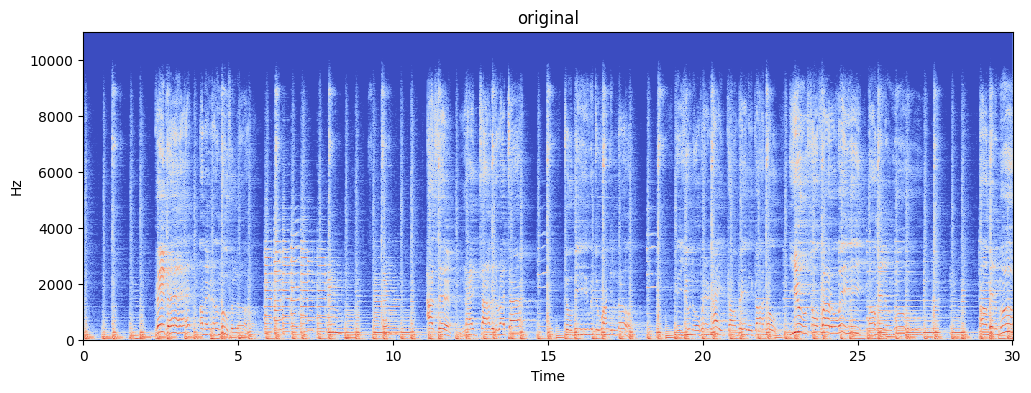

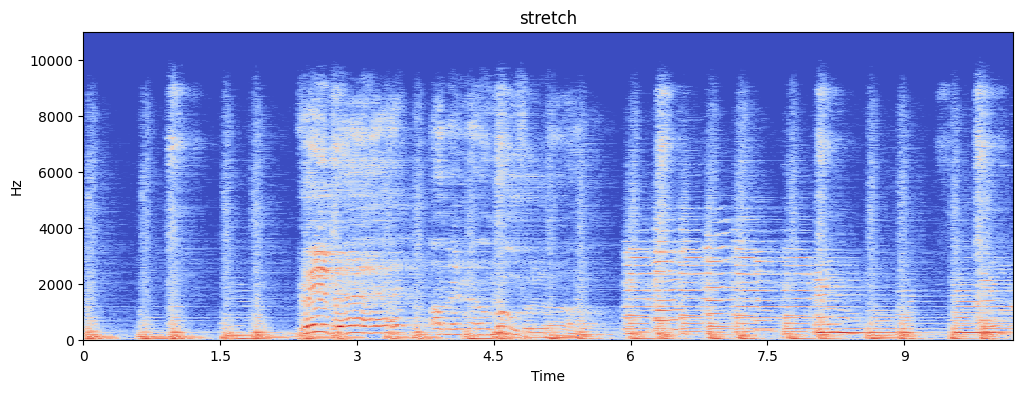

In [26]:
#stretch 적용
rate = 0.8 + np.random.random() *0.4
stretch_data_section = librosa.effects.time_stretch(
    data_section, rate=rate
)

#STFT 계산
stft_stretch = librosa.stft(stretch_data_section)
#dB
stft_stretch_db = librosa.amplitude_to_db(abs(stft_stretch))

#비교출력
plt.figure(figsize=(12,4))
librosa.display.specshow(stft_db, sr=sr, x_axis='time', y_axis='hz')
plt.title('original')

plt.figure(figsize=(12,4))
librosa.display.specshow(stft_stretch_db, sr=sr, x_axis='time', y_axis='hz')
plt.title('stretch')
plt.show()

## GTZAN Dataset – 샘플 음성 데이터 mel_spec 변환 및 Augmentation 적용

In [7]:
start_time = 0
end_time=0
start_sample = sr * start_time
end_sample = sr * end_time

dtaa_section_stft = data[start_sample: end_sample]

stft_temp = librosa.stft(dtaa_section_stft)

# 열 스펙토그램 계산
mel_spec_temp = librosa.feature.melspectrogram(S=abs(stft_temp))

#db변경
mel_spec_db_temp = librosa.amplitude_to_db(mel_spec_temp, ref = np.max)

#시각화
plt.figure(figsize=(12,4))
librosa.display.specshow(mel_spec_db_temp, sr=sr, x_axis='time', y_axis='hz')
plt.show()

ValueError: can't extend empty axis 0 using modes other than 'constant' or 'empty'